<a href="https://colab.research.google.com/github/Majdi21926/Tunisian_Currency_Classification_with_inceptionV3/blob/main/Tunisian_Currency_Classification_with_inceptionV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/DATA_SET/train'
valid_path = '/content/drive/My Drive/DATA_SET/test'

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/My Drive/DATA_SET/train/*')
folders


['/content/drive/My Drive/DATA_SET/train/10mili',
 '/content/drive/My Drive/DATA_SET/train/5dt',
 '/content/drive/My Drive/DATA_SET/train/50mili',
 '/content/drive/My Drive/DATA_SET/train/50dt',
 '/content/drive/My Drive/DATA_SET/train/2dt',
 '/content/drive/My Drive/DATA_SET/train/20dt',
 '/content/drive/My Drive/DATA_SET/train/20mili',
 '/content/drive/My Drive/DATA_SET/train/1dt',
 '/content/drive/My Drive/DATA_SET/train/200mili',
 '/content/drive/My Drive/DATA_SET/train/500mili',
 '/content/drive/My Drive/DATA_SET/train/10dt',
 '/content/drive/My Drive/DATA_SET/train/100mili']

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/DATA_SET/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 420 images belonging to 12 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/DATA_SET/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 145 images belonging to 12 classes.


# **Training**

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
14/14 [==============================] - 326s 23s/step - loss: 13.1685 - accuracy: 0.2637 - val_loss: 10.6928 - val_accuracy: 0.3655
Epoch 2/10
14/14 [==============================] - 126s 9s/step - loss: 6.0036 - accuracy: 0.5714 - val_loss: 4.5902 - val_accuracy: 0.5724
Epoch 3/10
14/14 [==============================] - 121s 9s/step - loss: 2.2523 - accuracy: 0.7492 - val_loss: 3.9194 - val_accuracy: 0.6138
Epoch 4/10
14/14 [==============================] - 121s 9s/step - loss: 1.8549 - accuracy: 0.7810 - val_loss: 4.8262 - val_accuracy: 0.6345
Epoch 5/10
14/14 [==============================] - 121s 9s/step - loss: 1.4589 - accuracy: 0.8626 - val_loss: 3.4955 - val_accuracy: 0.6690
Epoch 6/10
14/14 [==============================] - 121s 9s/step - loss: 0.5913 - accuracy: 0.9133 - val_loss: 3.1442 - val_accuracy: 0.7793
Epoch 7/10
14/14 [==============================] - 128s 9s/step - loss: 0.4581 - accuracy: 0.9292 - val_loss: 3.2267 - val_accuracy: 0.6828
Epoch 8/10

# **Evaluate on training set**

In [ ]:
import math
test_loss, test_accuracy = model.evaluate(test_set, steps=math.ceil(145/32))
print('Accuracy on test dataset:', test_accuracy)

5/5 [==============================] - 134s 25s/step - loss: 2.4343 - accuracy: 0.7793
Accuracy on test dataset: 0.7793103456497192


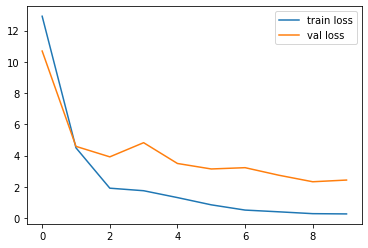

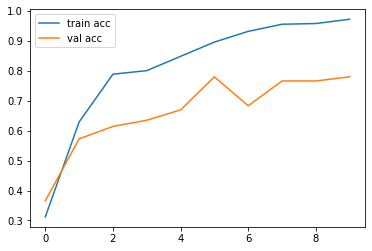

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model
inception_v3="model_inception.h5"

model.save(inception_v3)